나이브 베이즈(naive bayes)는 확률 기반 머신러닝 분류 알고리즘이다.  
나이브 베이즈 분류 알고리즘은 데이터를 나이브(단순)하고 독립적인 사건으로 가정하고 이 독립 사건들을 베이즈 이론(https://angeloyeo.github.io/2020/01/09/Bayes_rule.html)에 대입시켜 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘이다.
***
가우시안 나이브 베이즈(Gussian Naive Bayes)  
분류 특징들의 값이 정규(가우시안) 분포되어 있다는 가정하에 조건부 확률을 계산하며 연속적인 성질이 있는 특성 데이터를 분류하는데 적합하다.  

P(A): 어떤 사건 A가 일어날 확률  
P(B): 어떤 사건 B가 일어날 확률  
P(A|B): 어떤 사건 B가 일어났을 때 사건 A가 일어날 확률  
P(B|A): 어떤 사건 A가 일어났을 때 사건 B가 일어날 확률

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

<img src="./naive_bayes.png" width="1300" align="left"/>

<img src="./naive_bayes2.png" width="1100" align="left"/>

<img src="./naive_bayes3.png" width="1300" align="left"/>

베르누이 나이브 베이즈(Berniulli Naive Bayes)  
분류 데이터의 특징이 0 또는 1로 표현되었을 때 데이터의 출현 여부에 따라서 0 또는 1로 구분되는 데이터에 사용된다.  
***
다항분포 나이브 베이즈(Multinimial Naive Bayes)  
분류 데이터의 특징이 출현 횟수로 표현되었을 때 데이터의 출현 횟수에 따라 값을 달리하는 데이터에 사용된다.

In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

가우시안 나이브 베이즈를 활용한 붓꽃(iris) 분류  
iris 데이터를 활용해 데이터의 특징에 따라 붓꽃의 종류를 구분한다.

In [12]:
from sklearn.datasets import load_iris # 사이킷런이 제공하는 붗꽃(iris) 데이터를 불러오기 위해 import 한다.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayse 모델로 iris 데이터를 분류하기 위해 import 한다.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

데이터 획득  
사이킷런에서 제공하는 붓꽃(iris) 데이터 셋을 사용한다.

In [3]:
dataset = load_iris() # iris 데이터셋을 불러온다.
# print(type(dataset))
# print(dataset)
# print(dataset.data)
# print(dataset.feature_names)
# sepal length: 꽃 받침 길이, sepal width: 꽃 밫침 너비, petal length: 꽃잎 길이, petal width: 꽃잎 너비
# print(dataset.target_names) # setosa, versicolor, virginica: 품종
# print(dataset.target) # setosa => 0, versicolor => 1, virginica => 2: 레이블, 결과(답), 클래스, 타겟
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


데이터 시각화

In [4]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

꽃받침 길이

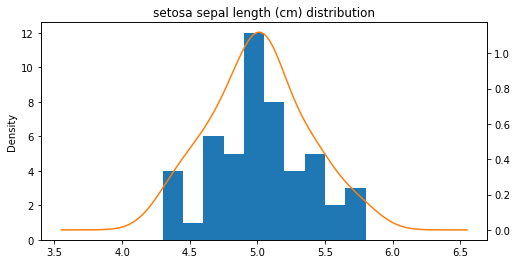

In [5]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', secondary_y=True, figsize=(8, 4), ax=ax,
    title='setosa sepal length (cm) distribution')
plt.show()

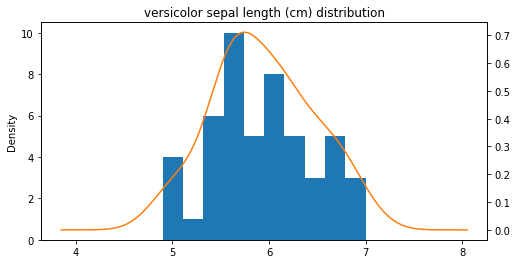

In [6]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', secondary_y=True, figsize=(8, 4), ax=ax,
    title='versicolor sepal length (cm) distribution')
plt.show()

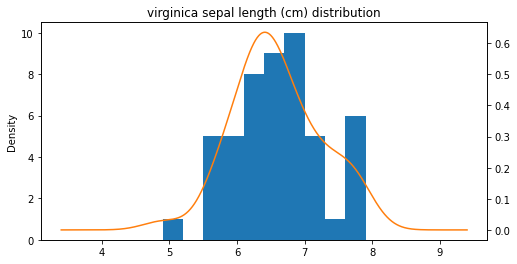

In [7]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', secondary_y=True, figsize=(8, 4), ax=ax,
    title='virginica sepal length (cm) distribution')
plt.show()

꽃받침 너비

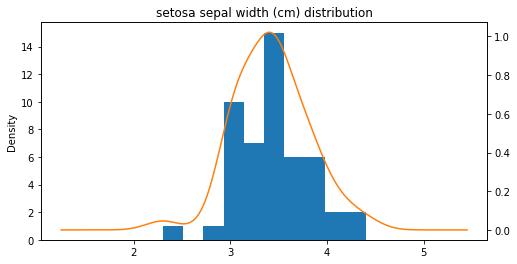

In [8]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', secondary_y=True, figsize=(8, 4), ax=ax,
    title='setosa sepal width (cm) distribution')
plt.show()

데이터 다듬기

In [9]:
# 전체 데이터의 20%를 테스트 데이터로 분리하고 나머지 80%를 학습에 사용한다.
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)
print('X_train: {}, X_test: {}'.format(len(X_train), len(X_test)))
print('y_train: {}, y_test: {}'.format(len(y_train), len(y_test)))
print('[꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비](문제): {}, 품종(답): {}'.format(X_train[0], y_train[0]))

X_train: 120, X_test: 30
y_train: 120, y_test: 30
[꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비](문제): [6.5 3.  5.5 1.8], 품종(답): 2


가우시안 나이브 베이즈 모델 학습

In [10]:
model = GaussianNB() # 가우시안 나이브 베이즈 모델 객체를 만든다.
model.fit(X_train, y_train) # 가우시안 나이브 베이즈 모델을 학습시킨다.

GaussianNB()

모델 테스트

In [11]:
predict = model.predict(X_test) # 학습 데이터로 학습한 결과에 따른 테스트 데이터의 예측값을 계산한다.
print(classification_report(y_test, predict)) # classification_report(실제값, 예측값)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [14]:
print('정확도(accuracy): {:.2f}'.format(accuracy_score(y_test, predict))) # accuracy_score(실제값, 예측값)

정확도(accuracy): 0.93


In [18]:
comparison = pd.DataFrame({'실제값': y_test, '예측값': predict})
comparison

,실제값,예측값
0,0,0
1,2,2
2,1,1
3,2,2
4,2,2
5,2,2
6,0,0
7,2,2
8,0,0
9,1,1
